# Example of Atom Arrays

## The linear lattice

In this notebook, we will explore the use of the Atom Arrays library. Specifically, the linear lattice will be explored to showcase and highlight basic features of this library.

First order of business: Import relevant modules. The Plots module has some built-in plotting routines compatible with Lattice and Hamiltonian objects (later will take AtomArray object instead). 

In [1]:
import sys
import os

sys.path.insert(0, os.path.realpath(os.path.pardir))

from State import *
from AtomArray import *
from ParameterSet import *
from ExperimentData import *
from Experiment import *
import Plots
import matplotlib.pyplot as plt

p = Plots.Plots()

## Plotting the decay rates of linear lattice

First, the program parameters are defined. For this purpose, let us choose 50 atoms, inter-atomic distance of 0.3, lattice axis along x-axis and polarization of dipole moments along x-axis: 

 - $N = 50$
 - $\frac{d}{\lambda_0} = 0.3$
 - $\hat{r}_{axis} = \hat{e}_x$
 - $\hat{n} = \hat{e}_x$

 The easiest way to input parameters are by using the Parameter and ParameterSet containter objects, which have many functionalities (more on that in a later notebook). By setting the "static" variable, it is indicated to the Experiment object, which parameters will be varied and over what values.

Text(0.5, 0.98, 'Decay rates of linear lattice ordered lowest to highest')

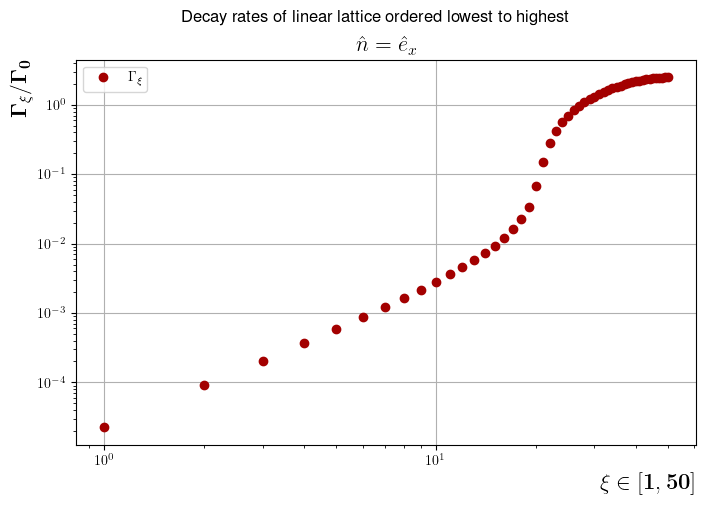

In [ ]:
N = 50

dlambda0 = 0.3
distance_pstart = 2*pi * dlambda0

parameters = ParameterSet({
    "N": Parameter("N", True, N, space="single"),
    "num_excitations": Parameter("num_excitations", True, 1),
    "greenstensor_type": "free-space",
    "distance": Parameter("distance", True, distance_pstart, space="single"), #Try passing dynamic parameter to see, if initialization is done correctly with p_start
    "direction": Parameter("direction", True, ex),
    "polarization": Parameter("polarization", True, ex)
})

atoms = AtomArray(parameters, lattice="linear", hamiltonian="block")

mytitle = r"Decay rates of linear lattice ordered lowest to highest"
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True)
fig.set_size_inches(8, 5)
fig_ = p.plotRatesLat(atoms.getLattice(), atoms.getHamiltonian(), ax=ax,
                     scalex="log", scaley="log", title=r"$\hat{n} = \hat{e}_x$",
                     label=r"$\Gamma_\xi$")

ax.legend()

fig.suptitle("Decay rates of linear lattice ordered lowest to highest")

Lowest decay rate:

In [3]:
min(atoms.getHamiltonian().getDecayRates())

np.float64(2.253608893656306e-05)

### The strictly anti-Hermitian Hamiltonian:

What do the decay rate look like for the strictly anti-Hermitian Hamiltonian? 

$H_{AH} = \frac{H - H^\dagger}{2}$

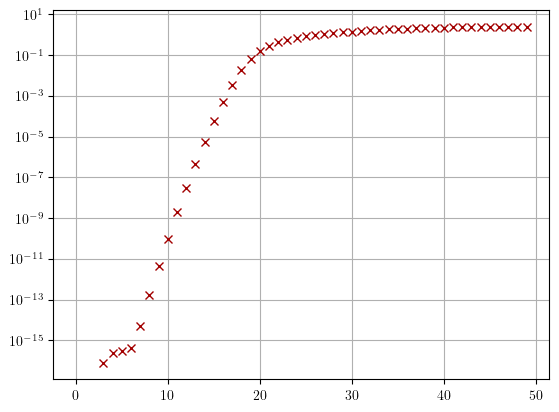

In [4]:
H = atoms.getHamiltonian().getHamMatrix()

antiHerm = (H - dagger(H))/2
val, vec = np.linalg.eig(antiHerm)

p.plot(range(N), np.sort(-2*val.imag), 'x')
#plt.xscale("log")
plt.yscale("log")

## What does the population on the lattice look like?

The population of the 5 lowest states:

The probabilities sum to:  0.9999999999999999
The probabilities sum to:  1.0000000000000002
The probabilities sum to:  0.9999999999999998
The probabilities sum to:  1.0
The probabilities sum to:  1.0


C:\Users\emilh\Desktop\code\Atom Arrays\Atom-Arrays\Hamiltonian.py:142: Warning: Probabilities exceed 1.
  warnings.warn(warning_hamiltonian_probabilities)


(-1.0, 5.0)

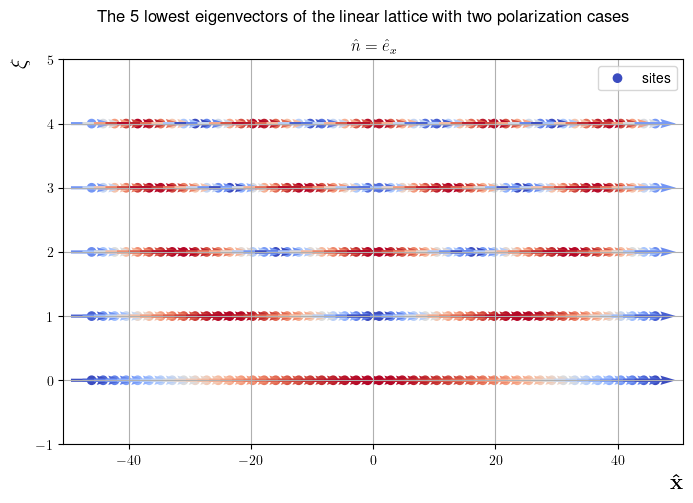

In [5]:
mytitle = r"The 5 lowest eigenvectors of the linear lattice with two polarization cases"
fig, ax = plt.subplots(nrows = 1, ncols=1, sharey=True)
fig.set_size_inches(8, 5)

p.plotDipolesPlane(atoms.getLattice(), plane="xz", title="", ax=ax,
                             ham = atoms.getHamiltonian(), index=0)
ax.legend()

for i in range(1,5):
    atoms.getLattice().getPositions()[:,2] += 1 #displace each eigenvector in the y-axis

    p.plotDipolesPlane(atoms.getLattice(), plane="xz", ax=ax, ham=atoms.getHamiltonian(), 
                       index=i, legend=False, ylim=(-1, 5), title=r"$\hat{n} = \hat{e}_x$")


fig.suptitle(mytitle)
ax.set_ylabel(r"$\xi$", loc="top")

ax.set_ylim((-1, 5))

## Let's try doing a simulation

The above showcasing only utilized the AtomArray, Lattice and Hamiltonian object. These are themselves only able to characterize static states. The Experiment object can evolve states in time. At first, let's evolve the decay of a handful of eigenstates. This means no parameter changes throughout the Experiment, and we expect an exponential decay with the respective states' decay rate. Let us evolve in a total time of $4 \cdot \Gamma_0^{-1}$ with a total of 1000 time steps. The evolution time and the total number of steps control the size of each time step.

We prepare the AtomArray object and Experiment object:
- With time evolution parameters as described,
- Number of atoms, interatomic distance and single excitation as described at top,
- Lattice and dipole moment polarization directions along x-axis. 

In [ ]:
T_run = 4
T_steps = 1000

parameters = ParameterSet({
    "N": Parameter("N", True, N, space="single"),
    "num_excitations": Parameter("num_excitations", True, 1),
    "greenstensor_type": "free-space",
    "distance": Parameter("distance", True, distance_pstart, space="single"),
    "direction": Parameter("direction", True, ex),
    "polarization": Parameter("polarization", True, ex)
})

atoms = AtomArray(parameters, lattice="linear", hamiltonian="block")

experiment = Experiment(atoms, parameters, evolve_decay = True, T_run = T_run, T_steps = T_steps)

We need to initialize the states, that we want to evolve. In this case, we want to evolve a set of eigenstates. We do this with the StateCollection object:

In [ ]:
test_states = StateCollection({
    0: State(N, 0, atoms.getEigenStates().getState(0).getValue(), atoms.getEigenStates().getState(0).getRightVector())
})

At first, let's just try the 0'th eigenstate, i.e. by default the state with the lowest decay rate. 